In [1]:
from qiskit import transpile, QuantumCircuit
import qiskit.quantum_info as qi
import qiskit
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, amplitude_damping_error
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import plot_histogram
import qiskit_superstaq as qss
#---------------Plain qft code starts--------------------
from concurrent.futures import ThreadPoolExecutor
from qiskit import *
from time import *
import numpy as np    
import supermarq
import os 

In [2]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure_all()

In [3]:
emulator = Aer.get_backend('aer_simulator_density_matrix')
qc = transpile(qc, emulator)
job = execute(qc, emulator, shots=8192, memory=True)

In [4]:
data=job.result()
counts = job.result().get_counts()
print(counts)

{'111': 4192, '000': 4000}


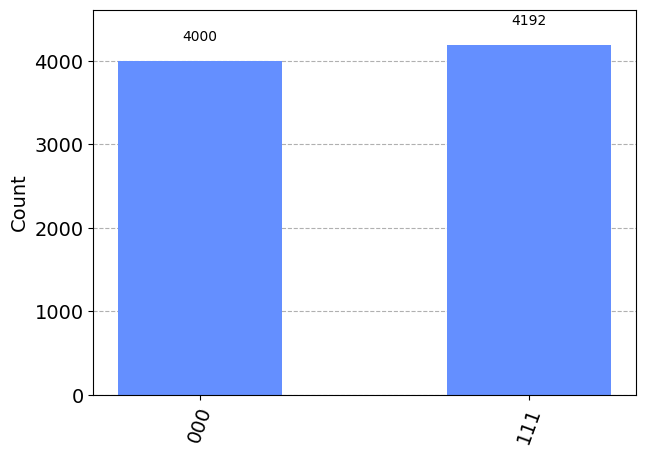

In [5]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

[0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0.0]


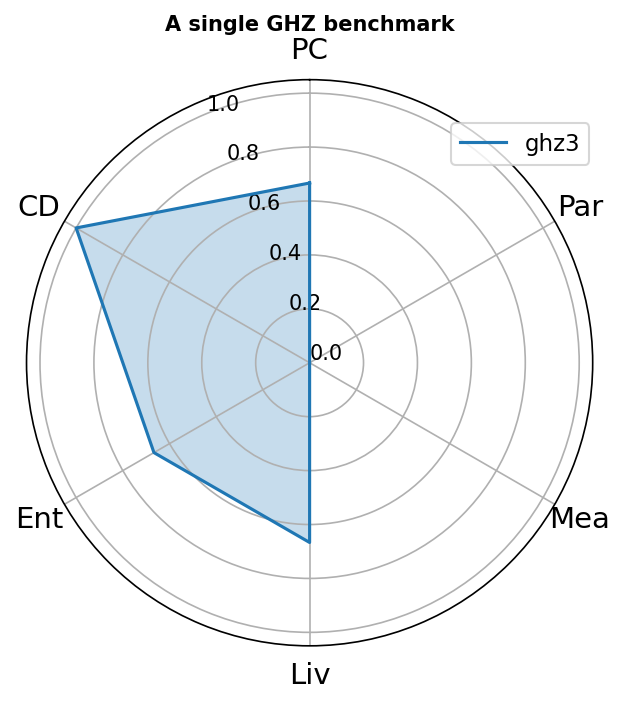

In [6]:
ghz_features = [
    supermarq.converters.compute_communication_with_qiskit(qc),
    supermarq.converters.compute_depth_with_qiskit(qc),
    supermarq.converters.compute_entanglement_with_qiskit(qc),
    supermarq.converters.compute_liveness_with_qiskit(qc),
    supermarq.converters.compute_measurement_with_qiskit(qc),
    supermarq.converters.compute_parallelism_with_qiskit(qc),
]
print(ghz_features)
supermarq.plotting.plot_benchmark(
    ["A single GHZ benchmark", ["ghz3"], [ghz_features]],
    spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],
)

In [20]:
device_scores = {}
counts = job.result().get_counts()
print(counts)
score = counts
device_scores[label] = score

{'111': 4192, '000': 4000}


NameError: name 'label' is not defined

In [17]:
counts = job.result().get_counts()
counts

{'111': 4192, '000': 4000}

In [11]:
supermarq.plotting.plot_correlations(
    ghz_features,
    device_scores=0.9,
    ["PC", "CD", "Ent", "Liv", "Mea", "Par"],
    device_name="aer_dm_sim",
)

SyntaxError: positional argument follows keyword argument (2789217425.py, line 6)

In [7]:
# Submit qiskit circuits via `qiskit-superstaq`
provider = qss.SuperstaqProvider("202f97a1b99771c90c22cbffdcd384824ca47f7cdf2d73e586d9d497a1b1908c")
print(provider.get_balance())
provider.get_targets(available=True)

19.45 credits


[Target(target='aqt_keysight_qpu', supports_submit=False, supports_submit_qubo=False, supports_compile=True, available=True, retired=False),
 Target(target='aqt_zurich_qpu', supports_submit=False, supports_submit_qubo=False, supports_compile=True, available=True, retired=False),
 Target(target='aws_dm1_simulator', supports_submit=True, supports_submit_qubo=False, supports_compile=True, available=True, retired=False),
 Target(target='aws_sv1_simulator', supports_submit=True, supports_submit_qubo=False, supports_compile=True, available=True, retired=False),
 Target(target='aws_tn1_simulator', supports_submit=True, supports_submit_qubo=False, supports_compile=True, available=True, retired=False),
 Target(target='cq_sqale_simulator', supports_submit=False, supports_submit_qubo=False, supports_compile=True, available=True, retired=False),
 Target(target='cq_sqorpius_qpu', supports_submit=False, supports_submit_qubo=False, supports_compile=True, available=True, retired=False),
 Target(target